<a href="https://colab.research.google.com/github/francis-100/ai_bootcamp/blob/main/smarthealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
!pip install streamlit
!pip install pyngrok==4.1.1

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from pyngrok import ngrok
import streamlit as st
import pickle
import warnings

In [107]:
# To ignore all warnings
warnings.filterwarnings("ignore")

In [108]:
# loading the diseases dataset to a pandas DataFrame
df_main = pd.read_csv('diseases_training.csv')

In [109]:
# Data preprocessing
df_main['diagnosis'] = df_main['diagnosis'].round().astype(int)

In [110]:
# Create a new DataFrame with only the selected symptoms
selected_symptoms = ["itching", "skin_rash", "continuous_sneezing", "chills", "joint_pain", "vomiting",
                     "fatigue", "weight_loss", "cough", "high_fever", "headache", "yellowish_skin","prognosis","diagnosis"]

df = df_main[selected_symptoms]

In [111]:
df['diagnosis'] = df['diagnosis'].round().astype(int)

In [112]:
# printing the first and last 5 rows of the dataset
df

,itching,skin_rash,continuous_sneezing,chills,joint_pain,vomiting,fatigue,weight_loss,cough,high_fever,headache,yellowish_skin,prognosis,diagnosis
0,1,1,0,0,0,0,0,0,0,0,0,0,Fungal infection,1
1,0,1,0,0,0,0,0,0,0,0,0,0,Fungal infection,1
2,1,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,1
3,1,1,0,0,0,0,0,0,0,0,0,0,Fungal infection,1
4,1,1,0,0,0,0,0,0,0,0,0,0,Fungal infection,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,1,0,0,0,0,1,0,(vertigo) Paroymsal Positional Vertigo,37
4916,0,1,0,0,0,0,0,0,0,0,0,0,Acne,38
4917,0,0,0,0,0,0,0,0,0,0,0,0,Urinary tract infection,39
4918,0,1,0,0,1,0,0,0,0,0,0,0,Psoriasis,40


In [113]:
# number of rows and Columns in this dataset
df.shape

(4920, 14)

In [114]:
# getting the statistical measures of the data
df.describe()

,itching,skin_rash,continuous_sneezing,chills,joint_pain,vomiting,fatigue,weight_loss,cough,high_fever,headache,yellowish_skin,diagnosis
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.045122,0.162195,0.139024,0.389024,0.392683,0.092683,0.114634,0.276829,0.230488,0.185366,20.999797
std,0.344730,0.366417,0.207593,0.368667,0.346007,0.487578,0.488397,0.290017,0.318612,0.447477,0.421188,0.388634,11.833680
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,31.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,41.000000


In [115]:
df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [116]:
class_counts = df['prognosis'].value_counts()
class_counts

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [117]:
df.groupby('prognosis').mean()

,itching,skin_rash,continuous_sneezing,chills,joint_pain,vomiting,fatigue,weight_loss,cough,high_fever,headache,yellowish_skin,diagnosis
prognosis,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,0.00,0.00,0.00,0.00,0.00,0.95,0.00,0.00,0.00,0.00,0.95,0.00,37.000000
AIDS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.95,0.00,0.00,7.000000
Acne,0.00,0.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,38.000000
Alcoholic hepatitis,0.00,0.00,0.00,0.00,0.00,0.95,0.00,0.00,0.00,0.00,0.00,0.95,25.000000
Allergy,0.00,0.00,0.90,0.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.000000
Arthritis,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,36.000000
Bronchial Asthma,0.00,0.00,0.00,0.00,0.00,0.00,0.90,0.00,0.90,0.95,0.00,0.00,10.000000
Cervical spondylosis,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13.000000
Chicken pox,0.95,0.95,0.00,0.00,0.00,0.00,0.95,0.00,0.00,0.95,0.95,0.00,17.000000


In [118]:
# separating the data and labels(features and targets)
y = df['diagnosis']
X = df.drop(['diagnosis', 'prognosis'], axis=1)

In [119]:
print(X)

      itching  skin_rash  continuous_sneezing  chills  joint_pain  vomiting  \
0           1          1                    0       0           0         0   
1           0          1                    0       0           0         0   
2           1          0                    0       0           0         0   
3           1          1                    0       0           0         0   
4           1          1                    0       0           0         0   
...       ...        ...                  ...     ...         ...       ...   
4915        0          0                    0       0           0         1   
4916        0          1                    0       0           0         0   
4917        0          0                    0       0           0         0   
4918        0          1                    0       0           1         0   
4919        0          1                    0       0           0         0   

      fatigue  weight_loss  cough  high_fever  head

In [120]:
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
4915    37
4916    38
4917    39
4918    40
4919    41
Name: diagnosis, Length: 4920, dtype: int64


In [121]:
# Splitting the data into training and testing sets, with 80% for training and 20% for testing.
# Stratify the split based on the target variable 'y' to maintain the distribution of classes.
# Setting random_state=2 for reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [122]:
# Initial, train, test shapes
print(X.shape, X_train.shape, X_test.shape)

(4920, 12) (3936, 12) (984, 12)


In [123]:
# Creating a Support Vector Machine (SVM) classifier with a linear kernel.
classifier = svm.SVC(kernel='linear')

In [124]:
#Training the support vector Machine Classifier
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [125]:
# Accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [126]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7248475609756098


In [127]:
# Accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [128]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.709349593495935


In [129]:
import numpy as np

# Input data for 12 symptoms
input_data = (1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1)

# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Assuming 'classifier' is a trained model
prediction = classifier.predict(input_data_reshaped)

diseases = [
    "Paroymsal Positional Vertigo", "AIDS", "Acne", "Alcoholic hepatitis", "Allergy", "Arthritis",
    "Bronchial Asthma", "Cervical spondylosis", "Chicken pox", "Chronic cholestasis", "Common Cold",
    "Dengue", "Diabetes", "Dimorphic hemmorhoids(piles)", "Drug Reaction", "Fungal infection", "GERD",
    "Gastroenteritis", "Heart attack", "Hepatitis B", "Hepatitis C", "Hepatitis D", "Hepatitis E",
    "Hypertension", "Hyperthyroidism", "Hypoglycemia", "Hypothyroidism", "Impetigo", "Jaundice", "Malaria",
    "Migraine", "Osteoarthristis", "Paralysis (brain hemorrhage)", "Peptic ulcer disease", "Pneumonia",
    "Psoriasis", "Tuberculosis", "Typhoid", "Urinary tract infection", "Varicose veins", "Hepatitis A",
]

if 1 <= prediction[0] <= len(diseases):
    print(f'The patient is suffering from {diseases[prediction[0] - 1]}.')
else:
    print('The patient is suffering from some disease.')

The patient is suffering from Drug Reaction.


In [130]:
# Matplotlib data

# Example array of symptoms
symptoms = ["Itching", "Skin Rash", "Continuous Sneezing", "Chills", "Joint Pain", "Vomiting",
            "Fatigue", "Weight Loss", "Cough", "High Fever", "Headache", "Yellowish Skin"]

# Example array of ages
ages = np.random.randint(18, 80, size=100)

# Example array of user input
user_input = np.random.choice([0, 1], size=len(symptoms))
user_input_values = np.random.randint(0, 2, len(ages))

# Example array of common diseases
common_diseases = [
    "Paroymsal Positional Vertigo", "AIDS", "Acne", "Alcoholic Hepatitis", "Allergy", "Arthritis",
    "Bronchial Asthma", "Cervical Spondylosis", "Chickenpox", "Chronic Cholestasis", "Common Cold",
    "Dengue", "Diabetes", "Dimorphic Hemorrhoids (Piles)", "Drug Reaction", "Fungal Infection", "GERD",
    "Gastroenteritis", "Heart Attack", "Hepatitis B", "Hepatitis C", "Hepatitis D", "Hepatitis E",
    "Hypertension", "Hyperthyroidism", "Hypoglycemia", "Hypothyroidism", "Impetigo", "Jaundice", "Malaria",
    "Migraine", "Osteoarthritis", "Paralysis (Brain Hemorrhage)", "Peptic Ulcer Disease", "Pneumonia",
    "Psoriasis", "Tuberculosis", "Typhoid", "Urinary Tract Infection", "Varicose Veins", "Hepatitis A",
]

# Example array of health status values
health_status = np.random.uniform(0, 100, size=100)
health_status_values = [90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40]

# Example array of disease prediction (index of the predicted disease in common_diseases)
disease_prediction = np.random.randint(1, len(common_diseases) + 1)

# Example array of time steps for health status over time
time_steps = np.arange(len(health_status))

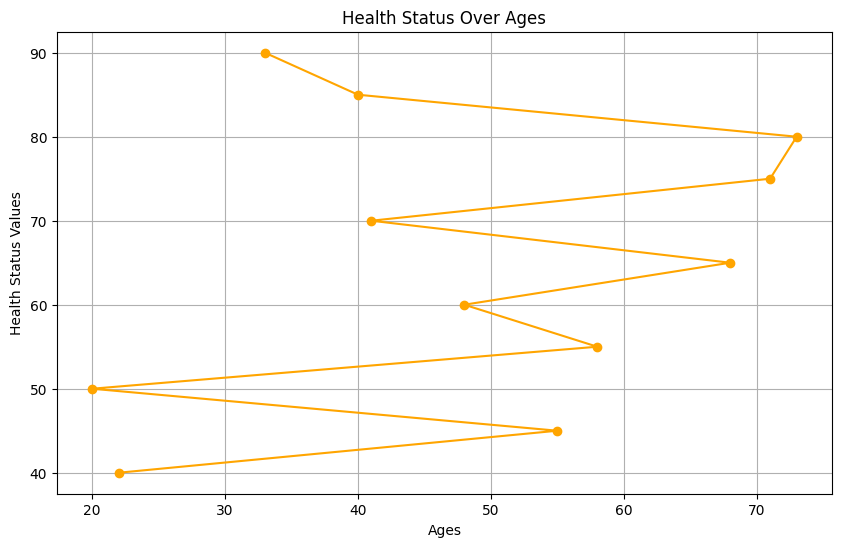

In [131]:
# Line Chart for Health Status over Ages

plt.figure(figsize=(10, 6))
plt.plot(ages[:len(health_status_values)], health_status_values, marker='o', linestyle='-', color='orange')
plt.xlabel('Ages')
plt.ylabel('Health Status Values')
plt.title('Health Status Over Ages')
plt.grid(True)
plt.show()

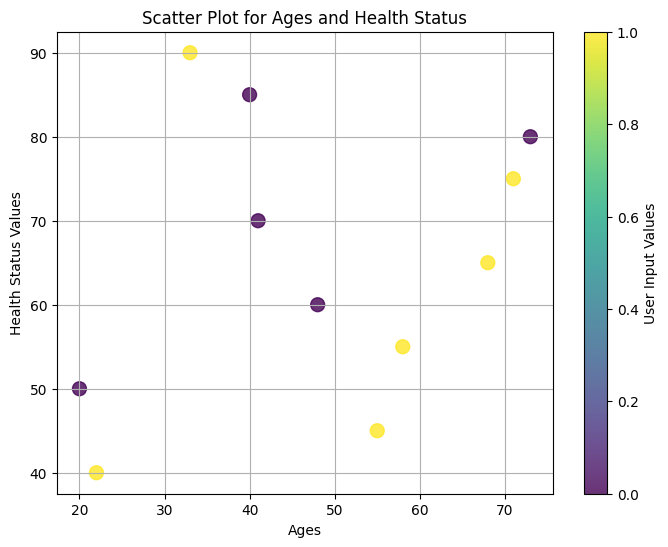

In [132]:
# Ensure ages and health_status_values have the same size
min_size = min(len(ages), len(health_status_values))
ages = ages[:min_size]
health_status_values = health_status_values[:min_size]

plt.figure(figsize=(8, 6))
plt.scatter(ages, health_status_values, c=user_input_values[:min_size], cmap='viridis', s=100, alpha=0.8)
plt.xlabel('Ages')
plt.ylabel('Health Status Values')
plt.title('Scatter Plot for Ages and Health Status')
plt.colorbar(label='User Input Values')
plt.grid(True)
plt.show()

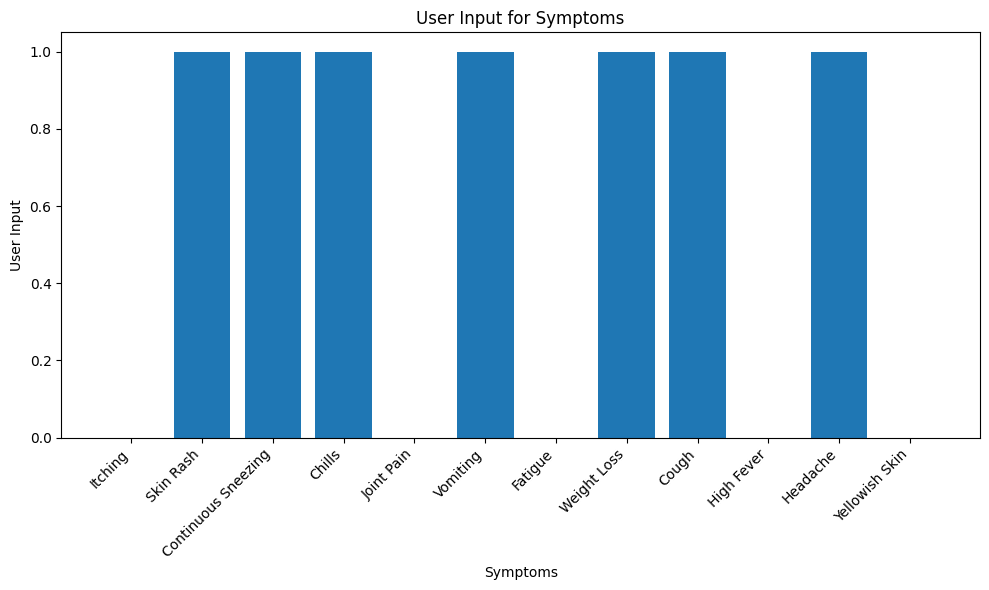

In [133]:
# Bar Chart for Symptoms

plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
plt.bar(symptoms, user_input)
plt.xlabel('Symptoms')
plt.ylabel('User Input')
plt.title('User Input for Symptoms')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

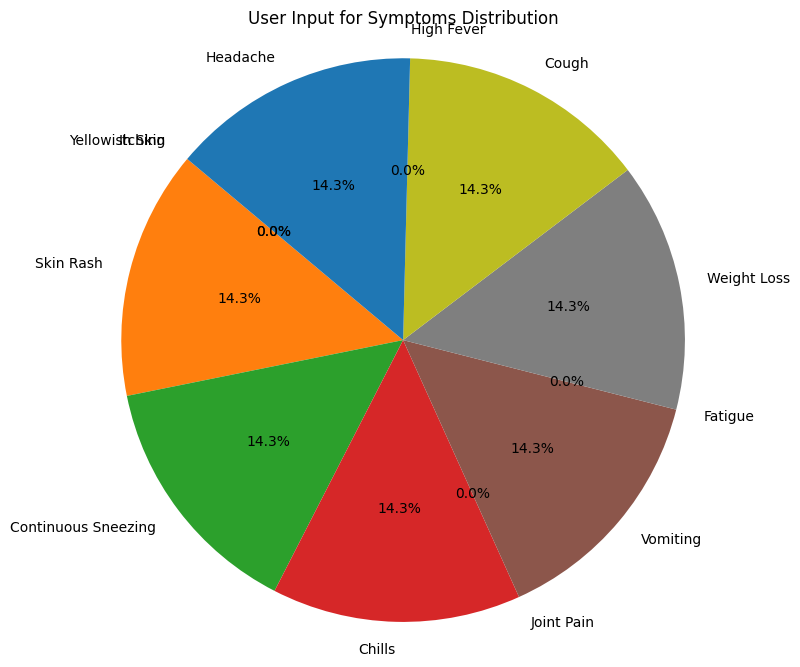

In [134]:
# Pie Chart for Symptoms Distribution

plt.figure(figsize=(8, 8))  # Adjust the width and height as needed

# Assuming 'user_input' is a list of binary values (0 or 1) for each symptom
symptom_labels = [' '.join(symptom.split()) for symptom in symptoms]  # Adjust labels for better readability

plt.pie(user_input, labels=symptom_labels, autopct='%1.1f%%', startangle=140)
plt.title('User Input for Symptoms Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

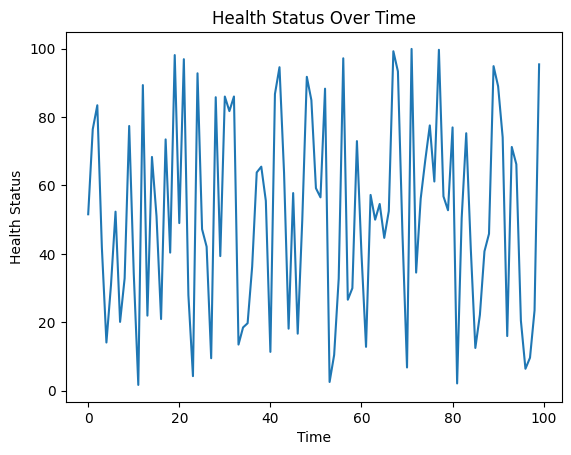

In [135]:
# Line Plot for Health Status Over Time

# Assuming 'health_status' is a list of health status values over time
time_steps = np.arange(len(health_status))
plt.plot(time_steps, health_status)
plt.xlabel('Time')
plt.ylabel('Health Status')
plt.title('Health Status Over Time')
plt.show()

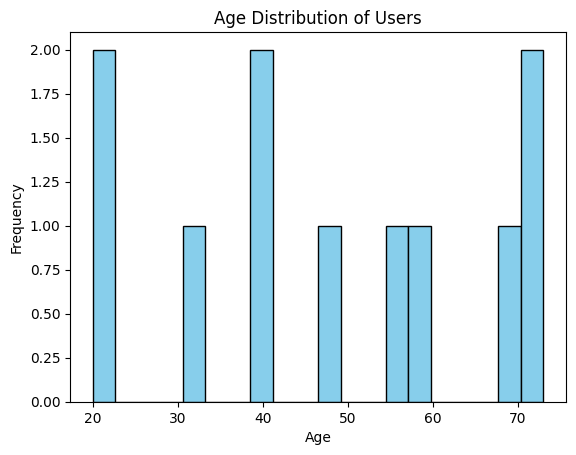

In [136]:
# Histogram for Age Distribution

# Assuming 'ages' is a list of user ages
plt.hist(ages, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Users')
plt.show()

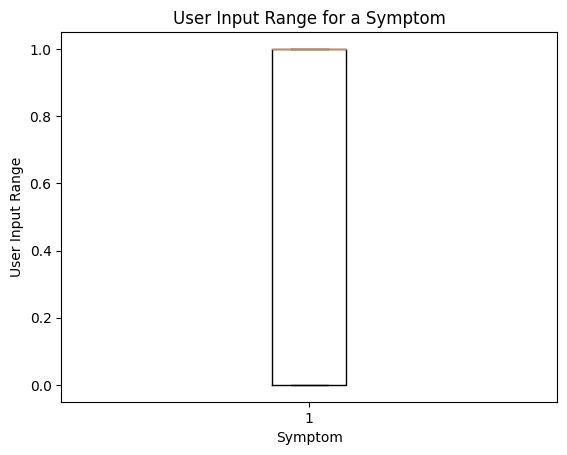

In [137]:
# Box Plot for User Input Range

# Assuming 'user_input' is a list of user inputs for a specific symptom
plt.boxplot(user_input)
plt.xlabel('Symptom')
plt.ylabel('User Input Range')
plt.title('User Input Range for a Symptom')
plt.show()

In [138]:
import pickle

In [139]:
# save the model using pickle
filename = 'diseases_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [140]:
# loading the saved model
loaded_model = pickle.load(open('diseases_model.sav', 'rb'))

In [141]:
import numpy as np

# Input data for 12 symptoms
input_data = (1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0)

# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Assuming 'classifier' is a trained model
prediction = classifier.predict(input_data_reshaped)

diseases = [
    "Paroymsal Positional Vertigo", "AIDS", "Acne", "Alcoholic hepatitis", "Allergy", "Arthritis",
    "Bronchial Asthma", "Cervical spondylosis", "Chicken pox", "Chronic cholestasis", "Common Cold",
    "Dengue", "Diabetes", "Dimorphic hemmorhoids(piles)", "Drug Reaction", "Fungal infection", "GERD",
    "Gastroenteritis", "Heart attack", "Hepatitis B", "Hepatitis C", "Hepatitis D", "Hepatitis E",
    "Hypertension", "Hyperthyroidism", "Hypoglycemia", "Hypothyroidism", "Impetigo", "Jaundice", "Malaria",
    "Migraine", "Osteoarthristis", "Paralysis (brain hemorrhage)", "Peptic ulcer disease", "Pneumonia",
    "Psoriasis", "Tuberculosis", "Typhoid", "Urinary tract infection", "Varicose veins", "Hepatitis A",
]

if 1 <= prediction[0] <= len(diseases):
    print(f'The patient is suffering from {diseases[prediction[0] - 1]}.')
else:
    print('The patient is suffering from some disease.')

The patient is suffering from GERD.


In [142]:
for column in X.columns:
  print(column)

itching
skin_rash
continuous_sneezing
chills
joint_pain
vomiting
fatigue
weight_loss
cough
high_fever
headache
yellowish_skin


In [143]:
# Create a new file app.py

In [144]:
!ngrok authtoken 2b2ZkpRhoJalycZbN3owwgNcxGy_wC76yMTvMEXk7r8Fjwwo

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [145]:
# Stop any existing ngrok tunnels (if any)
ngrok.kill()

In [146]:
# Set up the streamlit app
!streamlit run app.py &>/dev/null&
# !streamlit run --server.port 8501 app.py &

In [147]:
# Set up the ngrok tunnel
public_url = ngrok.connect(port='8501')
public_url

'http://7392-34-125-107-153.ngrok-free.app'